In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("./bike/train.csv")
test = pd.read_csv("./bike/test.csv")
sub = pd.read_csv("./bike/sampleSubmission.csv")

* 워싱턴 DC에서 계절에 따른 자전거 렌탈 수요 패턴
* test 컬럼 9개 
* train 컬럼 12개
* sampleSubmission 컬럼 2개
  * test와 train은 어떤 컬럼이 다른가? 
  * test 계절, 날씨, 온도
  * train은 없나요?
  * train에는 casual, registered, count가 더 있다.
    * 의미하는 바는 무엇일까요? 
      * casual(미가입자 렌탈수), 
      * registered(가입자 렌탈수)
      * count = casual + registered (시간별 자전거 렌탈수)
  * sub는 어떤 컬럼이 있는가? 
    * datetime, count : 의미하는 바는?(빌린시간, count? 시간당 자전거 렌탈 수)

* 왜 train, test, sub의 데이터 셋을 주었을까?
  * 각각의 용도
  * train 머신에게 공부시킬 데이터 셋
  * test 머신에게 예측을 시킬 데이터 셋
  * sub ? datetime(test의 datetime과 동일), count(전부0일까?)

* 년도가 언제부터 언제까지?
* 우리가 관심이 예측하려고 하는 피처(feature)는 뭘까?(자전거 렌탈 수요-어떤 컬럼)
  * 시간대별 자전거 렌탈수 (예측 대상이 되는 컬럼)-count
* train 기간은 2011년~2012년
  * 년월은 어떤 차이가 있나요? 없나요?(령주님)
  * train은 11년 1월 1일 ~ 12년 12월 19일
  * test은 11년 1월 20일 ~ 12년 12월 31일

In [3]:
print(train.shape, test.shape)

(10886, 12) (6493, 9)


In [4]:
# 학습용 - 입력, 출력
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
# 테스트용 - 입력, *(없음) *을 예측하기
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [6]:
# sub의 count에 예측값을 써서 제출하기
sub.columns

Index(['datetime', 'count'], dtype='object')

In [8]:
print( train.info() )
print()
print( test.info() )
print()
print( sub.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
sub.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


### 가장 간단한 모델을 만들기
 * 머신에게 입력데이터와 출력이 나온다. 
   * 데이터를 분리, X_train, y_train, X_test
   * 머신러닝 모델을 선택하고
   * 머신러닝 모델에 데이터를 넣어서 학습시키고,
   * 학습시킨 모델에 새로운 데이터(X_test)을 넣어서 출력예측(y_test) 
   * sub에 count에 y_test를 써서 제출한다.

In [12]:
# 데이터를 분리, X_train, y_train, X_test
sel = ['season', 'weather']
X_train = train[sel]      # 입력
y_train = train['count']  # 출력

X_test = test[sel]

In [13]:
# 머신러닝 모델 선택 - 회귀모형을 선택하겠다.
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()  # 모델 선택. 머신을 생성한다.

# model.fit(입력, 출력) # 학습용 데이터 셋 이용
model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(model.coef_)  # 회귀계수
print(model.intercept_)  # 절편

[ 26.71208253 -37.18595972]
177.36283373081758


* https://technology.cpm.org/general/3dgraph/
* ax+by+cz=d

* y(렌탈 대수) = 26.71 * x1(계절) + -37.18 * x2(날씨) + 177.362

In [18]:
pred = model.predict(X_test)  # 새로운 데이터에 대한 count를 예측

In [19]:
len(pred)

6493

In [20]:
sub['count'] = pred
sub.to_csv("firstSub.csv", index=False)

* 실습 
 * 여러개의 변수를 선택해서 각각 제출 후, 점수를 확인해 보기(최대 10번까지 가능)

* 제출 내용
 * 변수 : weather, holiday          
    * score : 1.56643
 * 변수 : weather, season           
    * score : 1.54085
 * 변수 : season, temp              
    * score : 1.44640
 * 변수 : windspeed, atemp          
    * score : 1.43684
 * 변수 : windspeed, humidity(습도)  
    * score : 1.47435
 * 변수 : season, temp, windspeed, atemp  
    * score : 1.44097

### 특징(feature) 3개 써보기

In [22]:
# 데이터를 분리, X_train, y_train, X_test
sel = ['season', 'temp', 'atemp', 'windspeed']
X_train = train[sel]      # 입력
y_train = train['count']  # 출력

X_test = test[sel]

In [23]:
model = LinearRegression()  # 모델 선택. 머신을 생성한다.

# model.fit(입력, 출력) # 학습용 데이터 셋 이용
model.fit(X_train, y_train)
pred = model.predict(X_test)  # 새로운 데이터에 대한 count를 예측

In [25]:
sub['count'] = pred

sub.loc[sub['count'] < 0, "count" ] = 0

In [26]:

sub.to_csv("secondSub.csv", index=False)

```
변수 : season, temp
score : 1.44640
변수 : windspeed, atemp
score : 1.43684
변수 : season, temp, windspeed, atemp
score : 1.44097
```

* 결과를 통해서 알게 된 내용
  * 특징(feature)이 많아진다고 해서 무조건 score가 좋아지는 것은 아니다.
  * 적은 변수가 더 좋은 결과를 낼 수도 있다.

* registered 특징(feature)는 사용이 안될까요?
  * 학습 데이터에는 있지만, 테스트 데이터에는 registered가 없기 때문에.

In [27]:
# 데이터를 분리, X_train, y_train, X_test
sel = ['temp', 'atemp', 'registered']
X_train = train[sel]      # 입력
y_train = train['count']  # 출력

X_test = test[sel]

KeyError: "['registered'] not in index"

```
변수 : season, temp
score : 1.44640
변수 : windspeed, atemp
score : 1.43684
변수 : season, temp, windspeed, atemp
score : 1.44097
```

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <a list of 10 Patch objects>)

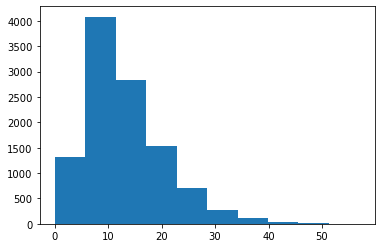

In [33]:
plt.hist(train['windspeed'])

In [34]:
train.windspeed.describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

### 5분 실습 미션 
 * 풍속을 중앙값으로 대체 시켜서 모델을 만든다.
 * 풍속을 전에 값으로 대체 시켜서 모델을 만든다.

### 모델 개선 시도
 * 변수 : windspeed, atemp
 * score : 1.43684

In [37]:
len( train.loc[ train['windspeed'] ==0 ,  ] )

1313

In [38]:
import numpy as np

In [39]:
np.median(train['windspeed'])

12.998

In [40]:
# 중앙값으로 대체
train.loc[ train['windspeed'] ==0 , 'windspeed' ] = np.median(train['windspeed'])
test.loc[ test['windspeed'] ==0 , 'windspeed' ] = np.median(test['windspeed'])

In [41]:
len( train.loc[ train['windspeed'] ==0 ,  ] )

0

In [42]:
# 특징(feature) 선택 및 모델 만들기
# 데이터를 분리, X_train, y_train, X_test
sel = ['atemp', 'windspeed']
X_train = train[sel]      # 입력
y_train = train['count']  # 출력

X_test = test[sel]

In [44]:
model = LinearRegression()  # 모델 선택. 머신을 생성한다.

# model.fit(입력, 출력) # 학습용 데이터 셋 이용
model.fit(X_train, y_train)
pred = model.predict(X_test)  # 새로운 데이터에 대한 count를 예측

In [46]:
sub['count'] = pred
sub.loc[sub['count'] < 0, "count" ] = 0

sub.to_csv("thirdSub.csv", index=False)

### score 1.43684 -> score : 1.42497
 * 결과적으로 풍속을 0을 대체한 것이 좋아졌다.